In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In [3]:
#Function to create random square array
def gen_random_conf(n):
    #input: n = length of array = width of array
    #output: random 10x10 array (-1/2's and +1/2's)
    
    A = np.random.choice([-0.5,0.5], size=(n,n))
    
    return(A)

In [4]:
#Compute energy as a function of J (i.e. assume J = 1)
@jit(nopython=True)
def calculate_energy(spin):
    
    #Determine if array is square
    spin_shape = spin.shape
    
    #Should end if array is not square
    if spin_shape[0] != spin_shape[1]:
        print("This is not a square matrix")
    #Continues code if array is square    
    elif spin_shape[0] == spin_shape[1]:
        N = spin_shape[0]
        
        energy = 0
        J = 1

        for i in range(N):  # 0, N-1
          for j in range(N): # 0, N-1
            # calculate four interactions
            for delta_i in range(-1,2,2):  # -1 and 1
              ii = i + delta_i
              if (ii < 0): 
                ii = ii + N
              if (ii >=N): 
                ii = ii - N
              energy = energy + spin[i,j]*spin[ii, j] #spin--> array name

            for delta_j in range(-1,2,2):  # -1 and 1
              jj = j + delta_j
              if (jj < 0): 
                jj = jj + N
              if (jj >=N): 
                jj = jj - N
              energy = energy + spin[i,j]*spin[i, jj] 

    energy = -J * energy * 0.5
    
    return energy
    
calculate_energy(gen_random_conf(10))

-5.0

The Main code calculates avg. magnetism and avg. energy over a given number of configurations.
$$ \langle M\rangle = \frac{\sum_j(M_j * e^{(-\beta*E_j)})}{\sum_j {e^{(-\beta*E_j)}}}$$

$$ \langle E\rangle = \frac{\sum_j(E_j * e^{(-\beta*E_j)})}{\sum_j {e^{(-\beta*E_j)}}}$$

$$ C = \frac{\partial E}{\partial T} $$

In [9]:
#Main code

k = 8.617E-5 #Boltzman constant (eV/K)
T = 300 #K

beta = 1 #J/kT
#Number of configurations that will contribute to averages
iterations = 10000
#Array size
N = 10

#Intializing arrays
beta_array, temp_array, energy_array, mag_array = [], [], [], []

#Determing beta based on temperature & initializing variables/resetting variables after each loop
for temp in np.linspace(0.0001, 1, 100):
    beta = 1/temp
    energy = 0.
    magnetism = 0. 
    denominator = 0. 
    
    #Generates given number of configurations and considers their energies/magnetizations in the averages
    for i in range(iterations):
        #Creates new random configuration
        spin = gen_random_conf(N)
        
        #Calculates the magnetism of configuration
        mag = np.sum(spin)/N/N 

        #Calculates the energy of configuration
        e = calculate_energy(spin)/N/2
        
        #Determines bolztman weight
        boltz = np.exp(-1*beta*e)
        #Values are included in the summations(numerators of equations for avg. magetism and energy)
        energy += e * boltz
        magnetism += mag * boltz
        denominator += boltz
    
    #Calculates average magnetism and energy
    magnetism = magnetism/denominator
    energy = energy/denominator



    #Adds values to arrays
    beta_array.append(beta)
    temp_array.append(1/beta)
    energy_array.append(energy)
    mag_array.append(magnetism)

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in exp
/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars


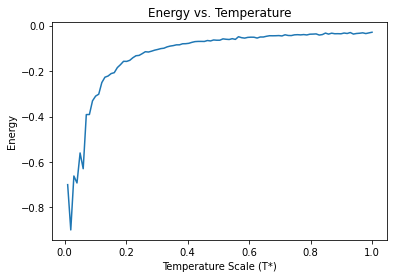

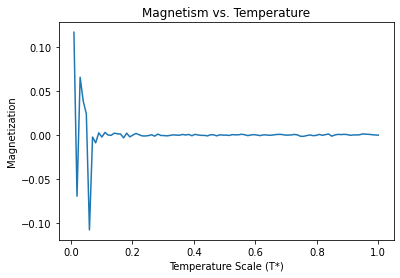

In [10]:
plt.title("Energy vs. Temperature") 
plt.xlabel("Temperature Scale (T*)"); 
plt.ylabel("Energy"); 
plt.plot(temp_array, energy_array) 
plt.show()

plt.title("Magnetism vs. Temperature")  
plt.xlabel("Temperature Scale (T*)"); 
plt.ylabel("Magnetization"); 
plt.plot(temp_array, mag_array)

plt.show()